# 1. 停车到达时间分布

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号

In [2]:
park_data = pd.read_csv(r"G:\停车数据\原始数据备份\11月份处理\更新最终结果.csv")
park_data

,parking_id_x,plate_no,arrive_time,hour_x,minute_x,parking_id_y,end_time,hour_y,minute_y,time_duration,temp_label,temp_timedelta
0,2506,临A0SR3A8,2022-02-17 10:13:35,10,13,2506,2022-02-17 10:23:43,10,23,0 days 00:10:08,True,608
1,2627,临A1CYMHP,2022-02-17 17:23:12,17,23,2627,2022-02-17 21:05:59,21,5,0 days 03:42:47,True,13367
2,2568,临A2UH7LA,2022-02-17 16:03:30,16,3,2568,2022-02-17 16:09:41,16,9,0 days 00:06:11,True,371
3,2568,临A4Q7J0W,2022-02-17 11:11:29,11,11,2568,2022-02-17 11:30:41,11,30,0 days 00:19:12,True,1152
4,5219,临A5HP57,2022-02-17 09:21:17,9,21,5219,2022-02-17 12:36:17,12,36,0 days 03:15:00,True,11700
...,...,...,...,...,...,...,...,...,...,...,...,...
319622,3130,黑MG7697,2022-02-17 14:39:53,14,39,3130,2022-02-17 17:48:33,17,48,0 days 03:08:40,True,11320
319623,3130,黑MG7697,2022-02-17 14:39:53,14,39,6801,2022-02-18 17:56:08,17,56,1 days 03:16:15,True,11775
319624,3130,黑MG7697,2022-02-17 14:40:49,14,40,6801,2022-02-18 22:10:23,22,10,1 days 07:29:34,True,26974
319625,3130,黑MG7697,2022-02-17 18:45:32,18,45,3130,2022-02-18 22:23:00,22,23,1 days 03:37:28,True,13048


C:\Users\11249\AppData\Local\Temp\ipykernel_10940\3482773247.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(park_data['hour_x'],bins=[x+1 for x in range(24)],axlabel='arrival')


<Axes: xlabel='arrival', ylabel='Density'>

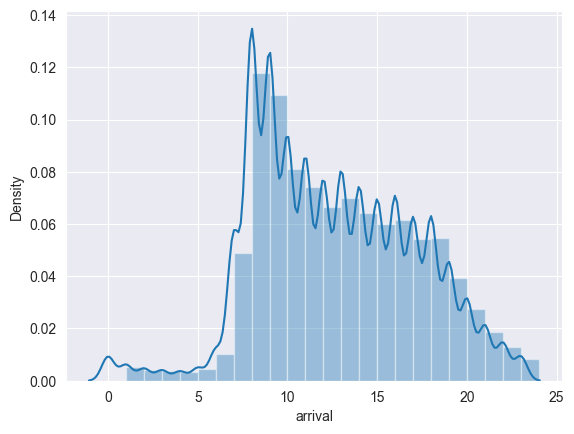

In [12]:
sns.distplot(park_data['hour_x'],bins=[x+1 for x in range(24)],axlabel='arrival')

In [4]:
park_data['park_t'] = park_data['temp_timedelta'] / 60
# sns.displot(data=park_data,x='hour_x',y='park_t')

In [16]:
def assign_park_label(row):
    if row['park_t'] <= 30:
        return 0
    elif row['park_t'] <= 120:
        return 1
    else:
        return 2
park_data['park_label'] = park_data.apply(assign_park_label, axis=1)

C:\Users\11249\AppData\Local\Temp\ipykernel_13736\2836682608.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(park_data['park_t'],color='darkviolet',axlabel='Park Duration',ax=axes)


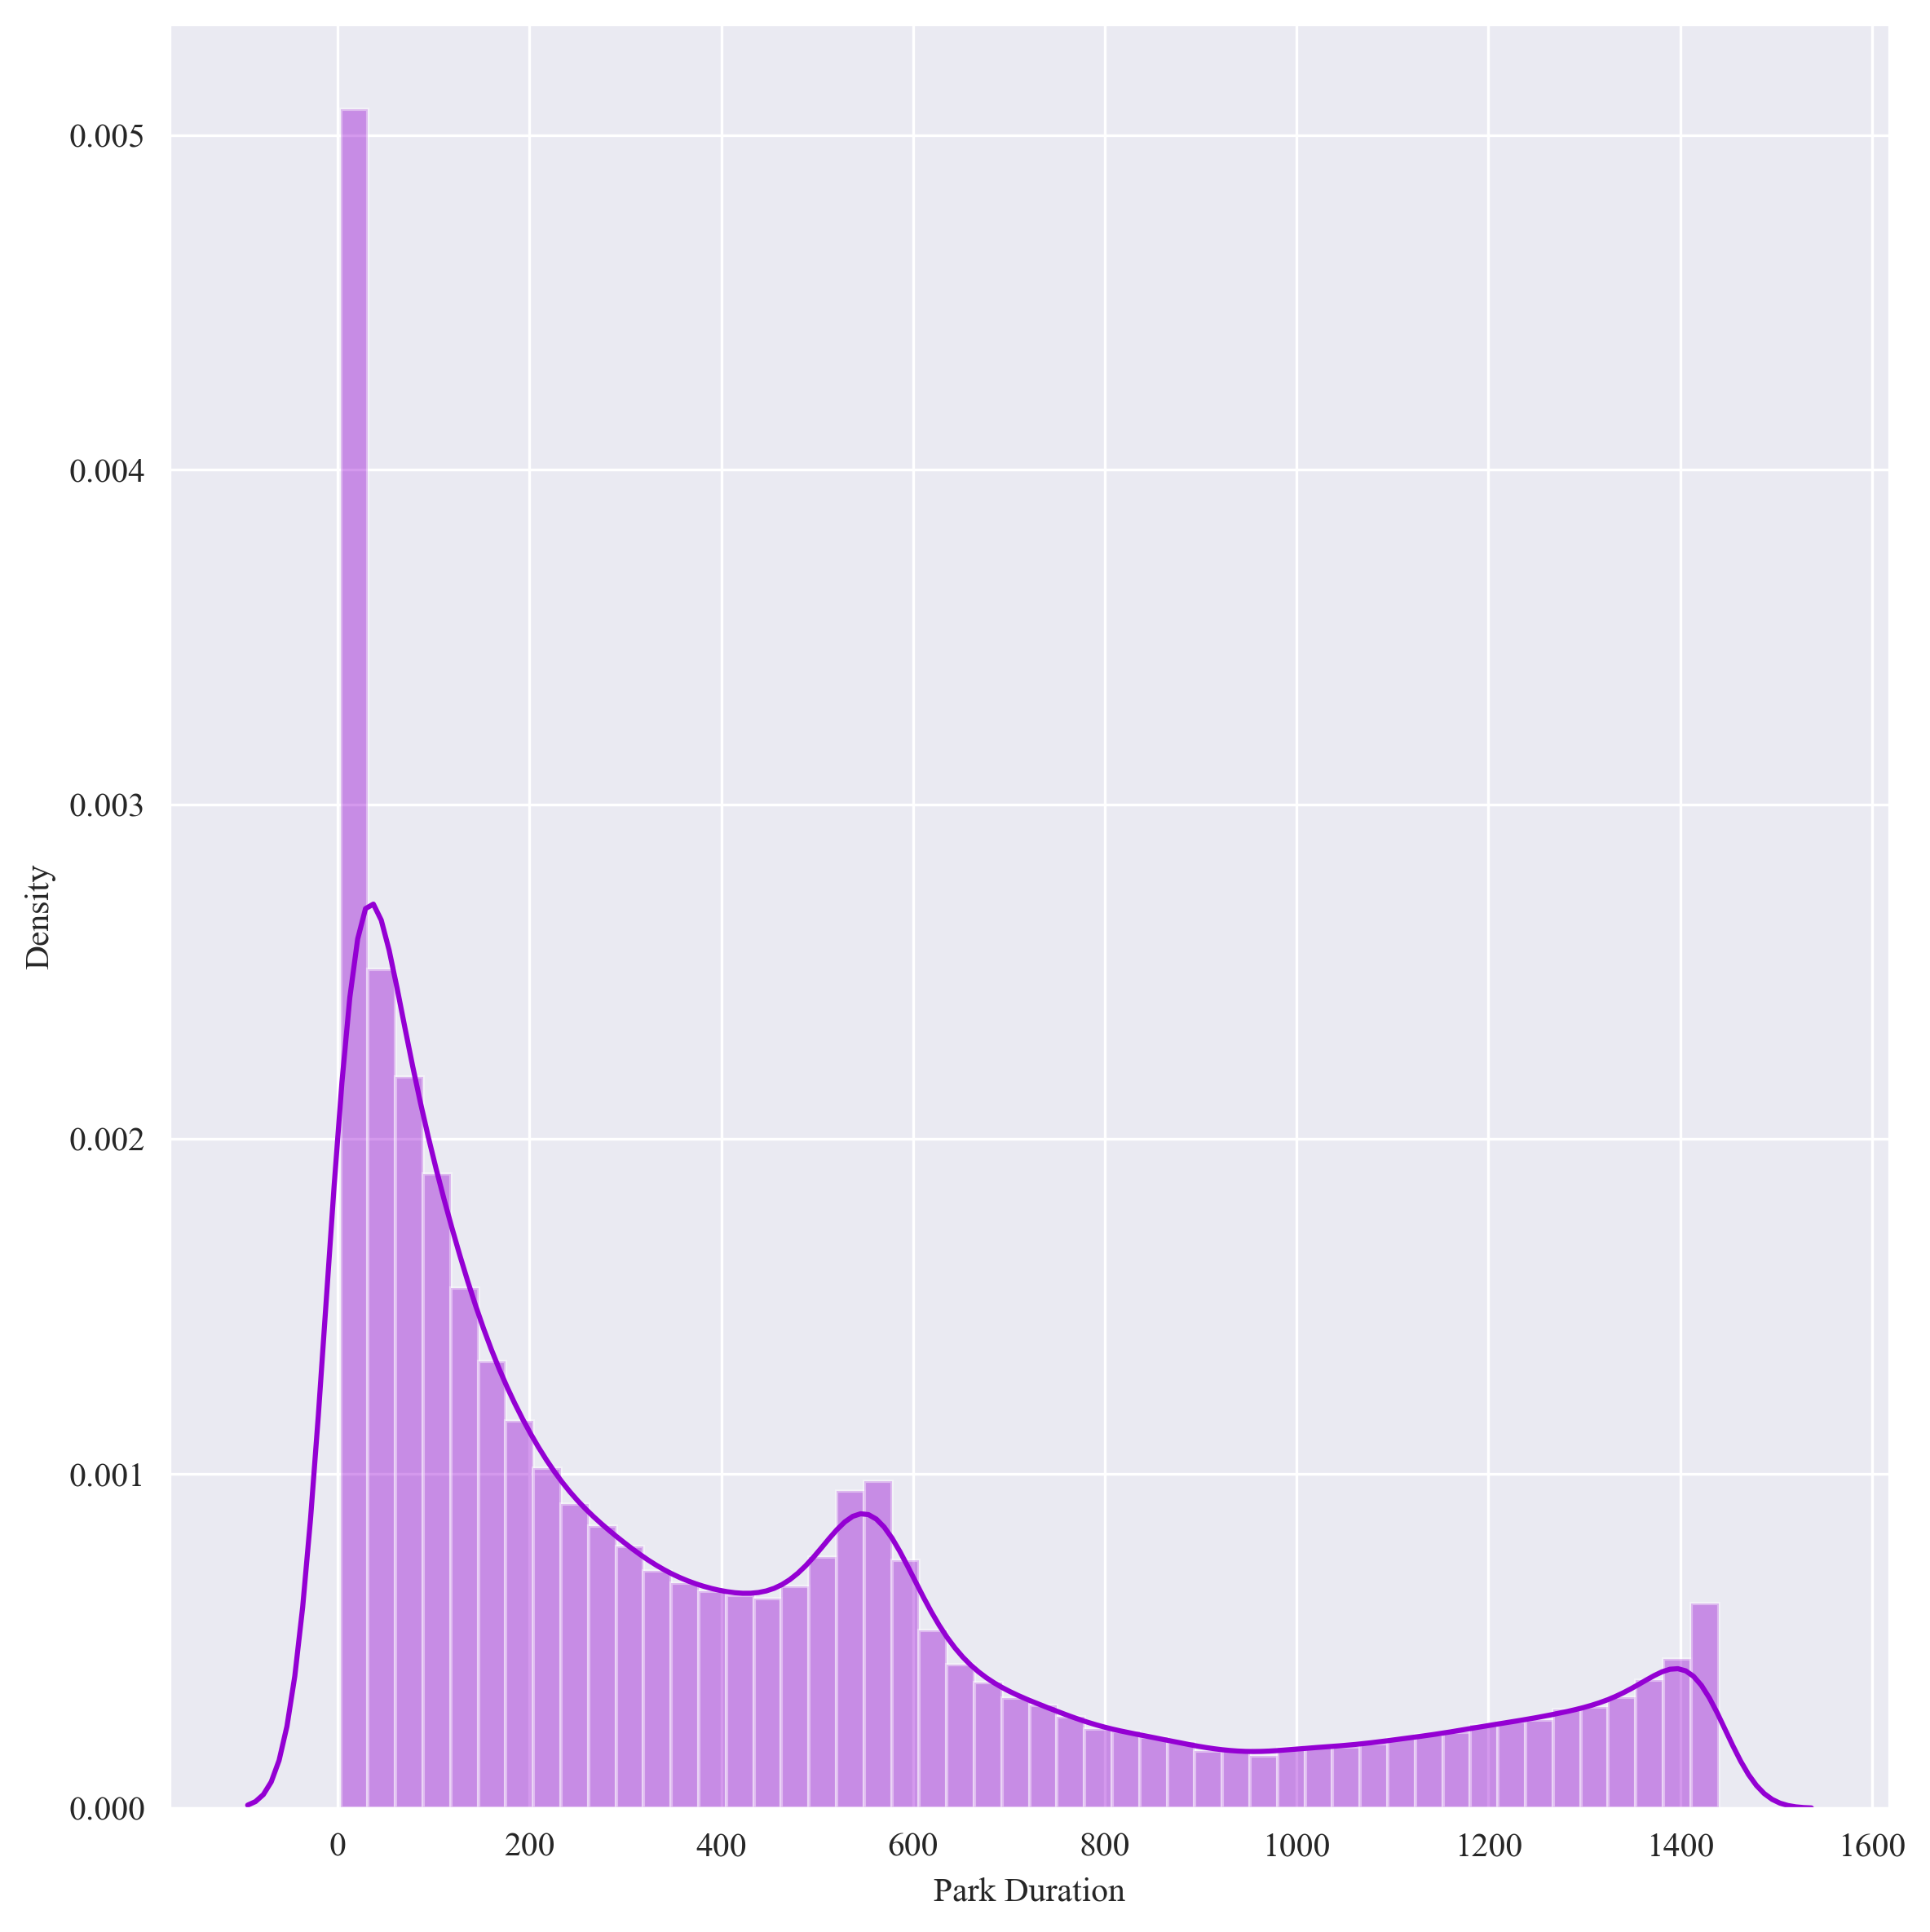

In [40]:
fig = plt.figure(figsize=(8,8),dpi=300)
axes = plt.subplot()
sns.distplot(park_data['park_t'],color='darkviolet',axlabel='Park Duration',ax=axes)
axes.set_ylabel('Density')
plt.tight_layout()
plt.savefig(r"G:\2023-纵向\停车分配\需求分布\park duration.png",dpi=300)
plt.show()

In [32]:
from sklearn.cluster import KMeans
X = park_data[['park_t']]
kmeans = KMeans(n_clusters=4,random_state=0).fit(X)
park_data['category'] = kmeans.labels_
print("Cluster centers:", kmeans.cluster_centers_)

# （可选）画出聚类结果
plt.scatter(park_data['park_t'], [0]*len(park_data), c=park_data['category'], cmap='viridis')
plt.show()

Cluster centers: [[ 351.84812146]
 [1247.05671171]
 [  79.40878098]
 [ 656.24300224]]


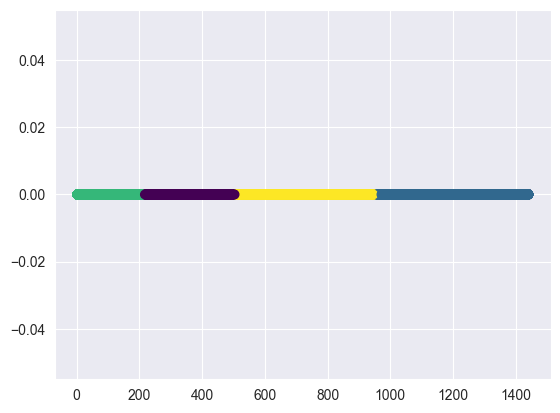

In [33]:
print("Cluster centers:", kmeans.cluster_centers_)

# （可选）画出聚类结果
plt.scatter(park_data['park_t'], [0]*len(park_data), c=park_data['category'], cmap='viridis')
plt.show()

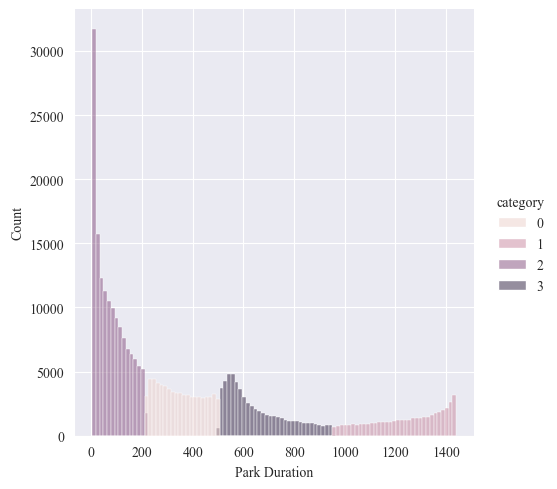

In [83]:
g = sns.displot(data=park_data,x='park_t',hue='category')
g.set_xlabels("Park Duration")
g.savefig(r"G:\2023-纵向\停车分配\需求分布\new park duration.png",dpi=300)

In [47]:
park_data[park_data['category']==3]['park_t'].describe()

count    60336.000000
mean       654.447310
std        120.265539
min        504.050000
25%        556.433333
50%        615.666667
75%        735.783333
max        951.633333
Name: park_t, dtype: float64

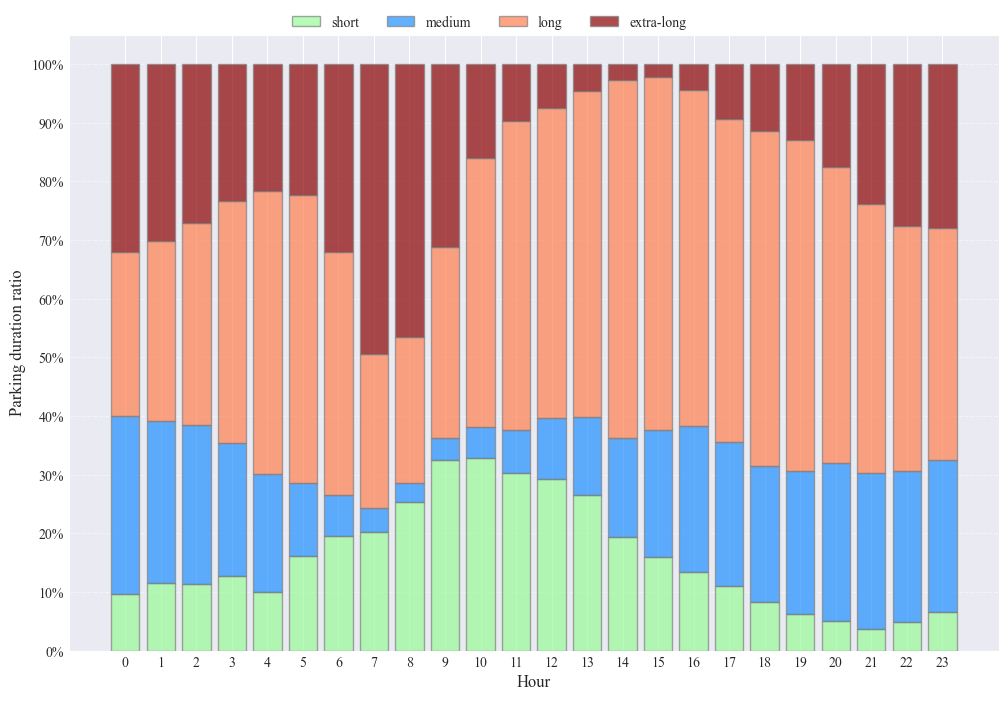

In [37]:
ori_data = park_data[['hour_x','park_t','category']]
group_data = ori_data.groupby('hour_x')

plt.rcParams['font.family'] = 'Times New Roman'
count_value = []
for i,each in enumerate(group_data):
    count_value.append([len(each[1].loc[each[1]['category']==i])/len(each[1]) for i in range(4)])
plt.figure(figsize=(12,8))
x = [i for i in range(24)]
for i in range(24):
    temp0 = count_value[i][0]
    temp1 = count_value[i][1]
    temp2 = count_value[i][2]
    temp3 = count_value[i][3]
    plt.bar(x[i],height=temp0,label='0',color='#98FB98',edgecolor='grey',zorder=5,alpha=0.7)
    plt.bar(x[i],height=temp1,bottom=temp0,label='1',color='#1E90FF',edgecolor='grey',zorder=5,alpha=0.7)
    plt.bar(x[i],height=temp2,bottom=temp0+temp1,label='2',color='#FF7F50',edgecolor='grey',zorder=5,alpha=0.7)
    plt.bar(x[i],height=temp3,bottom=temp0+temp1+temp2,label='3',color='darkred',edgecolor='grey',zorder=5,alpha=0.7)
plt.xlabel('Hour',fontsize=12)
plt.ylabel('Parking duration ratio',fontsize=12)
plt.tick_params(axis='both',which='both',direction='in',labelsize=10)
plt.xticks(x,x)
plt.yticks(np.arange(0,1.1,0.1),[f'{i}%' for i in range(0,110,10)])
plt.grid(axis='y',alpha=0.5,ls='--')
plt.figlegend(['short','medium','long','extra-long'],frameon=False,bbox_to_anchor=(0.65,0.92),ncol=4)
plt.savefig(r"G:\2023-纵向\停车分配\需求分布\停车时长分类新.png",dpi=300,bbox_inches='tight')
plt.show()

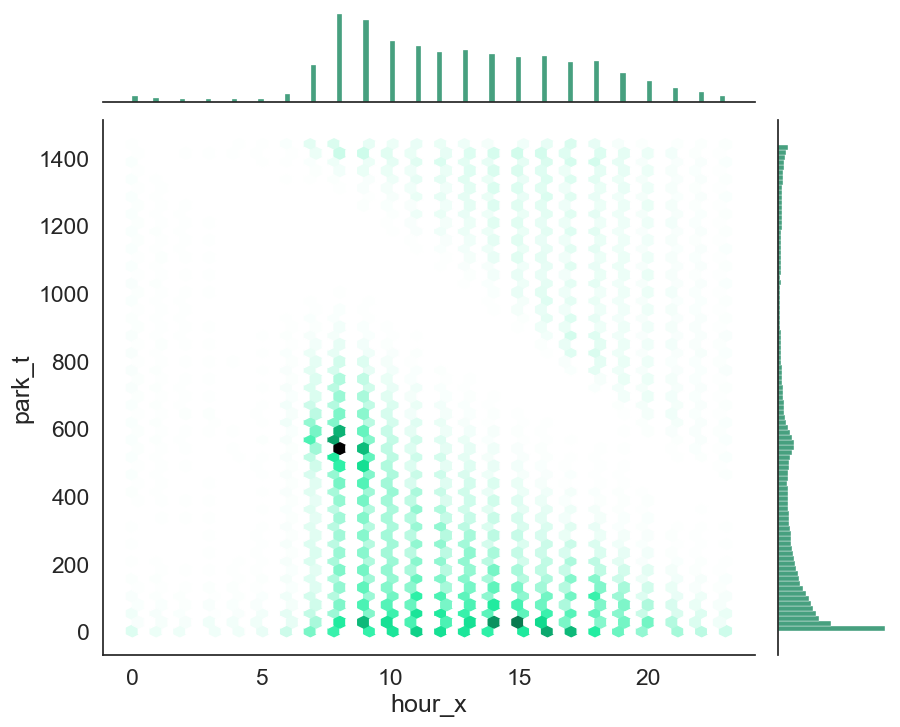

In [4]:
sns.set(style="white",font_scale=1.5)#设置主题，文本大小
g = sns.jointplot(x='hour_x', y='park_t', data=park_data,#输入两个绘图变量
                 color='#098154',#修改颜色
                 kind='hex')
g.fig.set_size_inches(10,8)#设置图尺寸

In [48]:
charge_data = pd.read_excel(r"G:\2023-纵向\停车分配\需求分布\杭州充电数据.xlsx")
charge_data

,省,市,区,电费,服务费,优惠,电量,状态,充电点名称,开始电量,结束电量,充电时长(分),开始时间,结束时间,尖电量,峰电量,平电量,谷电量,枪口号
0,浙江省,杭州市,上城区,26.8722,2.0445,0.0,29.209,结算已到账,万马爱充杭州大厦501站,15.0,96.0,67.92,2024-03-17 23:58:50,2024-03-18 01:06:45,0.0,0.0,0.0,29.21,1.0
1,浙江省,杭州市,上城区,15.1286,9.4554,0.0,31.518,结算已到账,万马爱充明石大厦站,35.0,98.0,50.68,2024-03-17 23:58:31,2024-03-18 00:49:12,0.0,0.0,0.0,31.52,1.0
2,浙江省,杭州市,萧山区,5.6735,2.0967,0.0,12.334,结算已到账,万马爱充精峰世纪大厦站,58.0,98.0,22.15,2024-03-17 23:58:26,2024-03-18 00:20:35,0.0,0.0,0.0,12.33,2.0
3,浙江省,杭州市,余杭区,15.8194,5.9696,0.0,29.848,结算已到账,杭州顺帆科技园充电站,40.0,99.0,73.13,2024-03-17 23:58:22,2024-03-18 01:11:30,0.0,0.0,0.0,29.85,1.0
4,浙江省,杭州市,临安区,4.5508,3.4131,0.0,22.754,结算已到账,临安西墅文体中心充电站,63.0,100.0,69.27,2024-03-17 23:58:36,2024-03-18 01:07:52,0.0,0.0,0.0,22.75,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37821,浙江省,杭州市,余杭区,18.2099,7.4326,0.0,37.163,结算已到账,杭州顺帆科技园充电站,36.0,98.0,54.17,2024-03-11 00:01:16,2024-03-11 00:55:26,0.0,0.0,0.0,37.16,2.0
37822,浙江省,杭州市,西湖区,11.6904,6.0887,0.0,24.355,结算已到账,万马爱充世创未来中心快充站,44.0,94.0,42.85,2024-03-11 00:00:41,2024-03-11 00:43:32,0.0,0.0,0.0,24.36,2.0
37823,浙江省,杭州市,余杭区,10.3132,4.6878,0.0,23.439,结算已到账,青芒公寓充电站（地面快充）,47.0,100.0,47.97,2024-03-11 00:00:53,2024-03-11 00:48:51,0.0,0.0,0.0,23.44,1.0
37824,浙江省,杭州市,萧山区,13.3344,16.1918,0.0,47.623,结算已到账,万马爱充精峰世纪大厦站,2.0,97.0,73.22,2024-03-11 00:00:25,2024-03-11 01:13:38,0.0,0.0,0.0,47.62,1.0


In [49]:
charge_data['开始时间'] = pd.to_datetime(charge_data['开始时间'])

In [50]:
def get_hour(row):
    return row.hour
charge_data['start_c'] = charge_data['开始时间'].apply(get_hour)

In [10]:
charge_data

,省,市,区,电费,服务费,优惠,电量,状态,充电点名称,开始电量,结束电量,充电时长(分),开始时间,结束时间,尖电量,峰电量,平电量,谷电量,枪口号,start_c
0,浙江省,杭州市,上城区,26.8722,2.0445,0.0,29.209,结算已到账,万马爱充杭州大厦501站,15.0,96.0,67.92,2024-03-17 23:58:50,2024-03-18 01:06:45,0.0,0.0,0.0,29.21,1.0,23.0
1,浙江省,杭州市,上城区,15.1286,9.4554,0.0,31.518,结算已到账,万马爱充明石大厦站,35.0,98.0,50.68,2024-03-17 23:58:31,2024-03-18 00:49:12,0.0,0.0,0.0,31.52,1.0,23.0
2,浙江省,杭州市,萧山区,5.6735,2.0967,0.0,12.334,结算已到账,万马爱充精峰世纪大厦站,58.0,98.0,22.15,2024-03-17 23:58:26,2024-03-18 00:20:35,0.0,0.0,0.0,12.33,2.0,23.0
3,浙江省,杭州市,余杭区,15.8194,5.9696,0.0,29.848,结算已到账,杭州顺帆科技园充电站,40.0,99.0,73.13,2024-03-17 23:58:22,2024-03-18 01:11:30,0.0,0.0,0.0,29.85,1.0,23.0
4,浙江省,杭州市,临安区,4.5508,3.4131,0.0,22.754,结算已到账,临安西墅文体中心充电站,63.0,100.0,69.27,2024-03-17 23:58:36,2024-03-18 01:07:52,0.0,0.0,0.0,22.75,2.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37821,浙江省,杭州市,余杭区,18.2099,7.4326,0.0,37.163,结算已到账,杭州顺帆科技园充电站,36.0,98.0,54.17,2024-03-11 00:01:16,2024-03-11 00:55:26,0.0,0.0,0.0,37.16,2.0,0.0
37822,浙江省,杭州市,西湖区,11.6904,6.0887,0.0,24.355,结算已到账,万马爱充世创未来中心快充站,44.0,94.0,42.85,2024-03-11 00:00:41,2024-03-11 00:43:32,0.0,0.0,0.0,24.36,2.0,0.0
37823,浙江省,杭州市,余杭区,10.3132,4.6878,0.0,23.439,结算已到账,青芒公寓充电站（地面快充）,47.0,100.0,47.97,2024-03-11 00:00:53,2024-03-11 00:48:51,0.0,0.0,0.0,23.44,1.0,0.0
37824,浙江省,杭州市,萧山区,13.3344,16.1918,0.0,47.623,结算已到账,万马爱充精峰世纪大厦站,2.0,97.0,73.22,2024-03-11 00:00:25,2024-03-11 01:13:38,0.0,0.0,0.0,47.62,1.0,0.0


C:\Users\11249\AppData\Local\Temp\ipykernel_21056\3630140491.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(charge_data['start_c'],bins=[x for x in range(24)],axlabel='arrival')


<Axes: xlabel='arrival', ylabel='Density'>

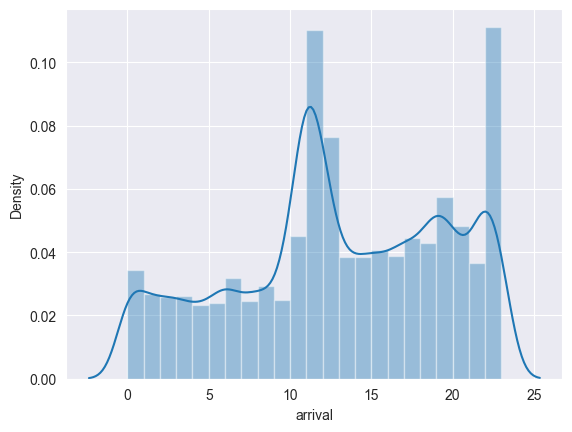

In [13]:
sns.distplot(park_data['hour_x'],bins=[x+1 for x in range(24)],axlabel='arrival')
sns.distplot(charge_data['start_c'],bins=[x for x in range(24)],axlabel='arrival')

C:\Users\11249\AppData\Local\Temp\ipykernel_21056\680230300.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(charge_data['start_c'],bins=[x for x in range(24)],axlabel='Charge Arrival',ax=axes)


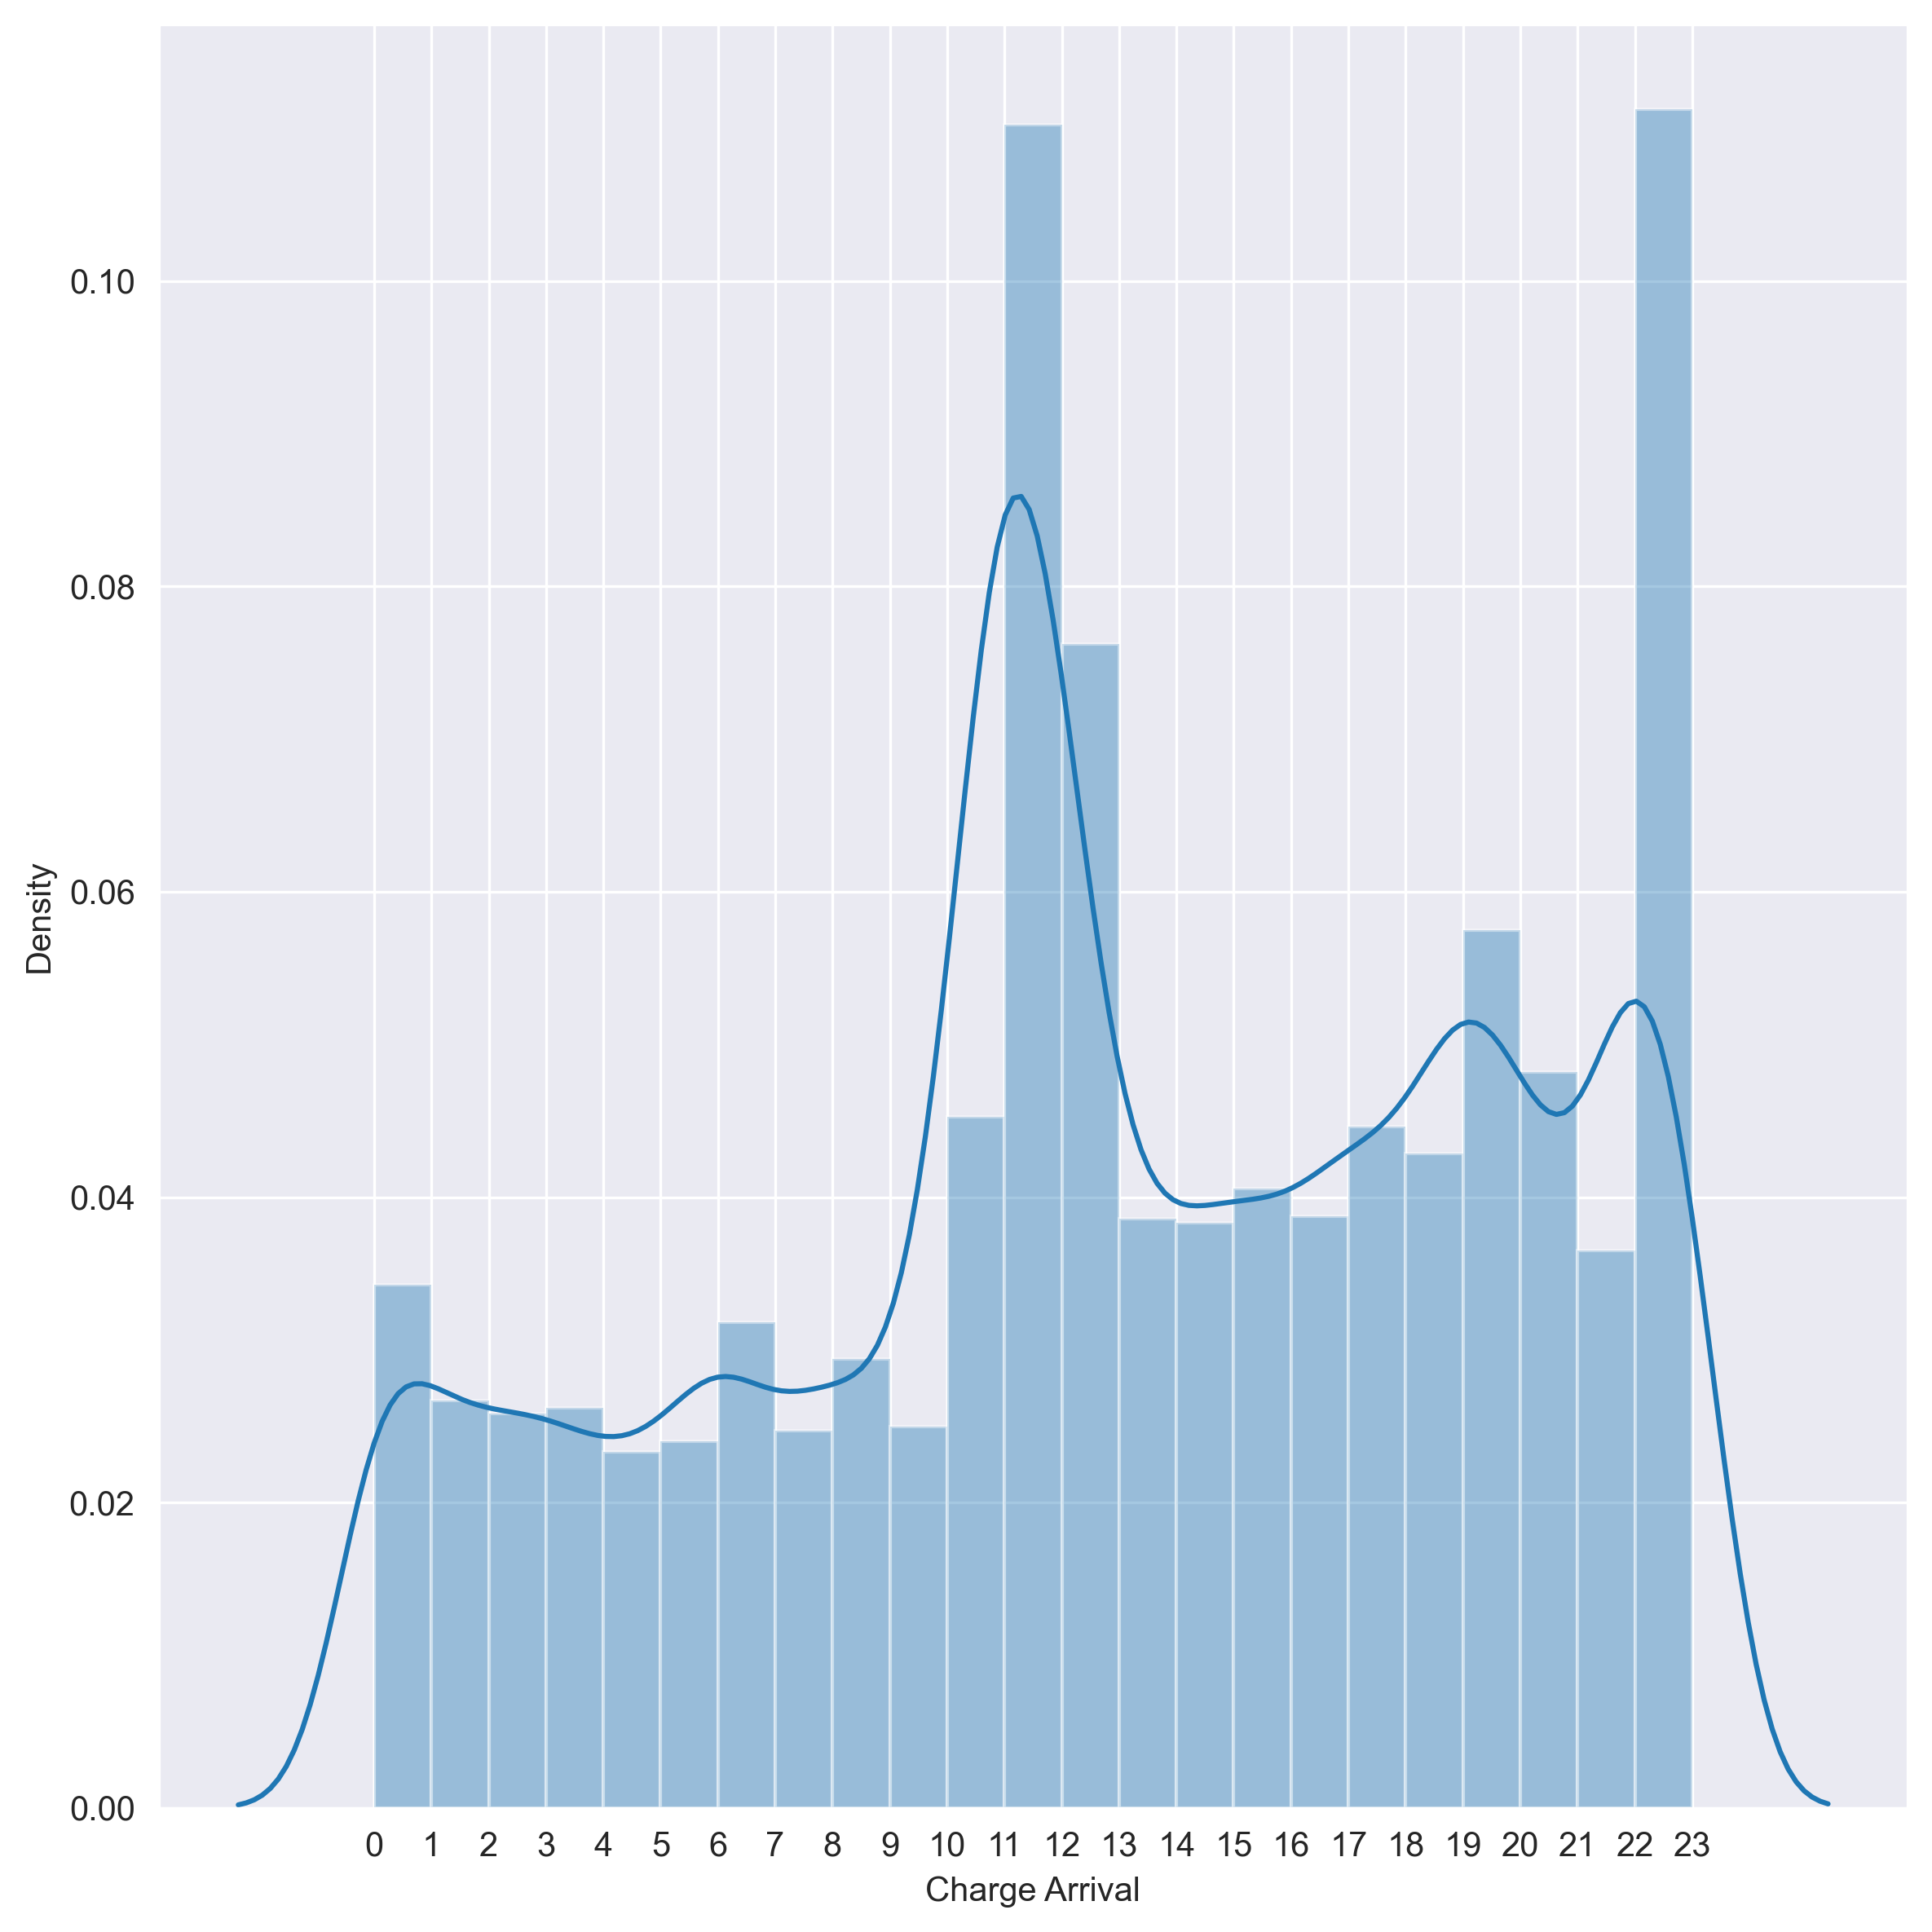

In [39]:
fig = plt.figure(figsize=(8,8),dpi=300)
axes = plt.subplot()
sns.distplot(charge_data['start_c'],bins=[x for x in range(24)],axlabel='Charge Arrival',ax=axes)
axes.set_xticks([x for x in range(24)])
axes.set_ylabel('Density')
plt.tight_layout()
plt.savefig(r"G:\2023-纵向\停车分配\需求分布\charge_arrival.png",dpi=300)
plt.show()

C:\Users\11249\AppData\Local\Temp\ipykernel_21056\718505749.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(park_data['hour_x'],bins=[x for x in range(24)],axlabel='Park Arrival',ax=axes)


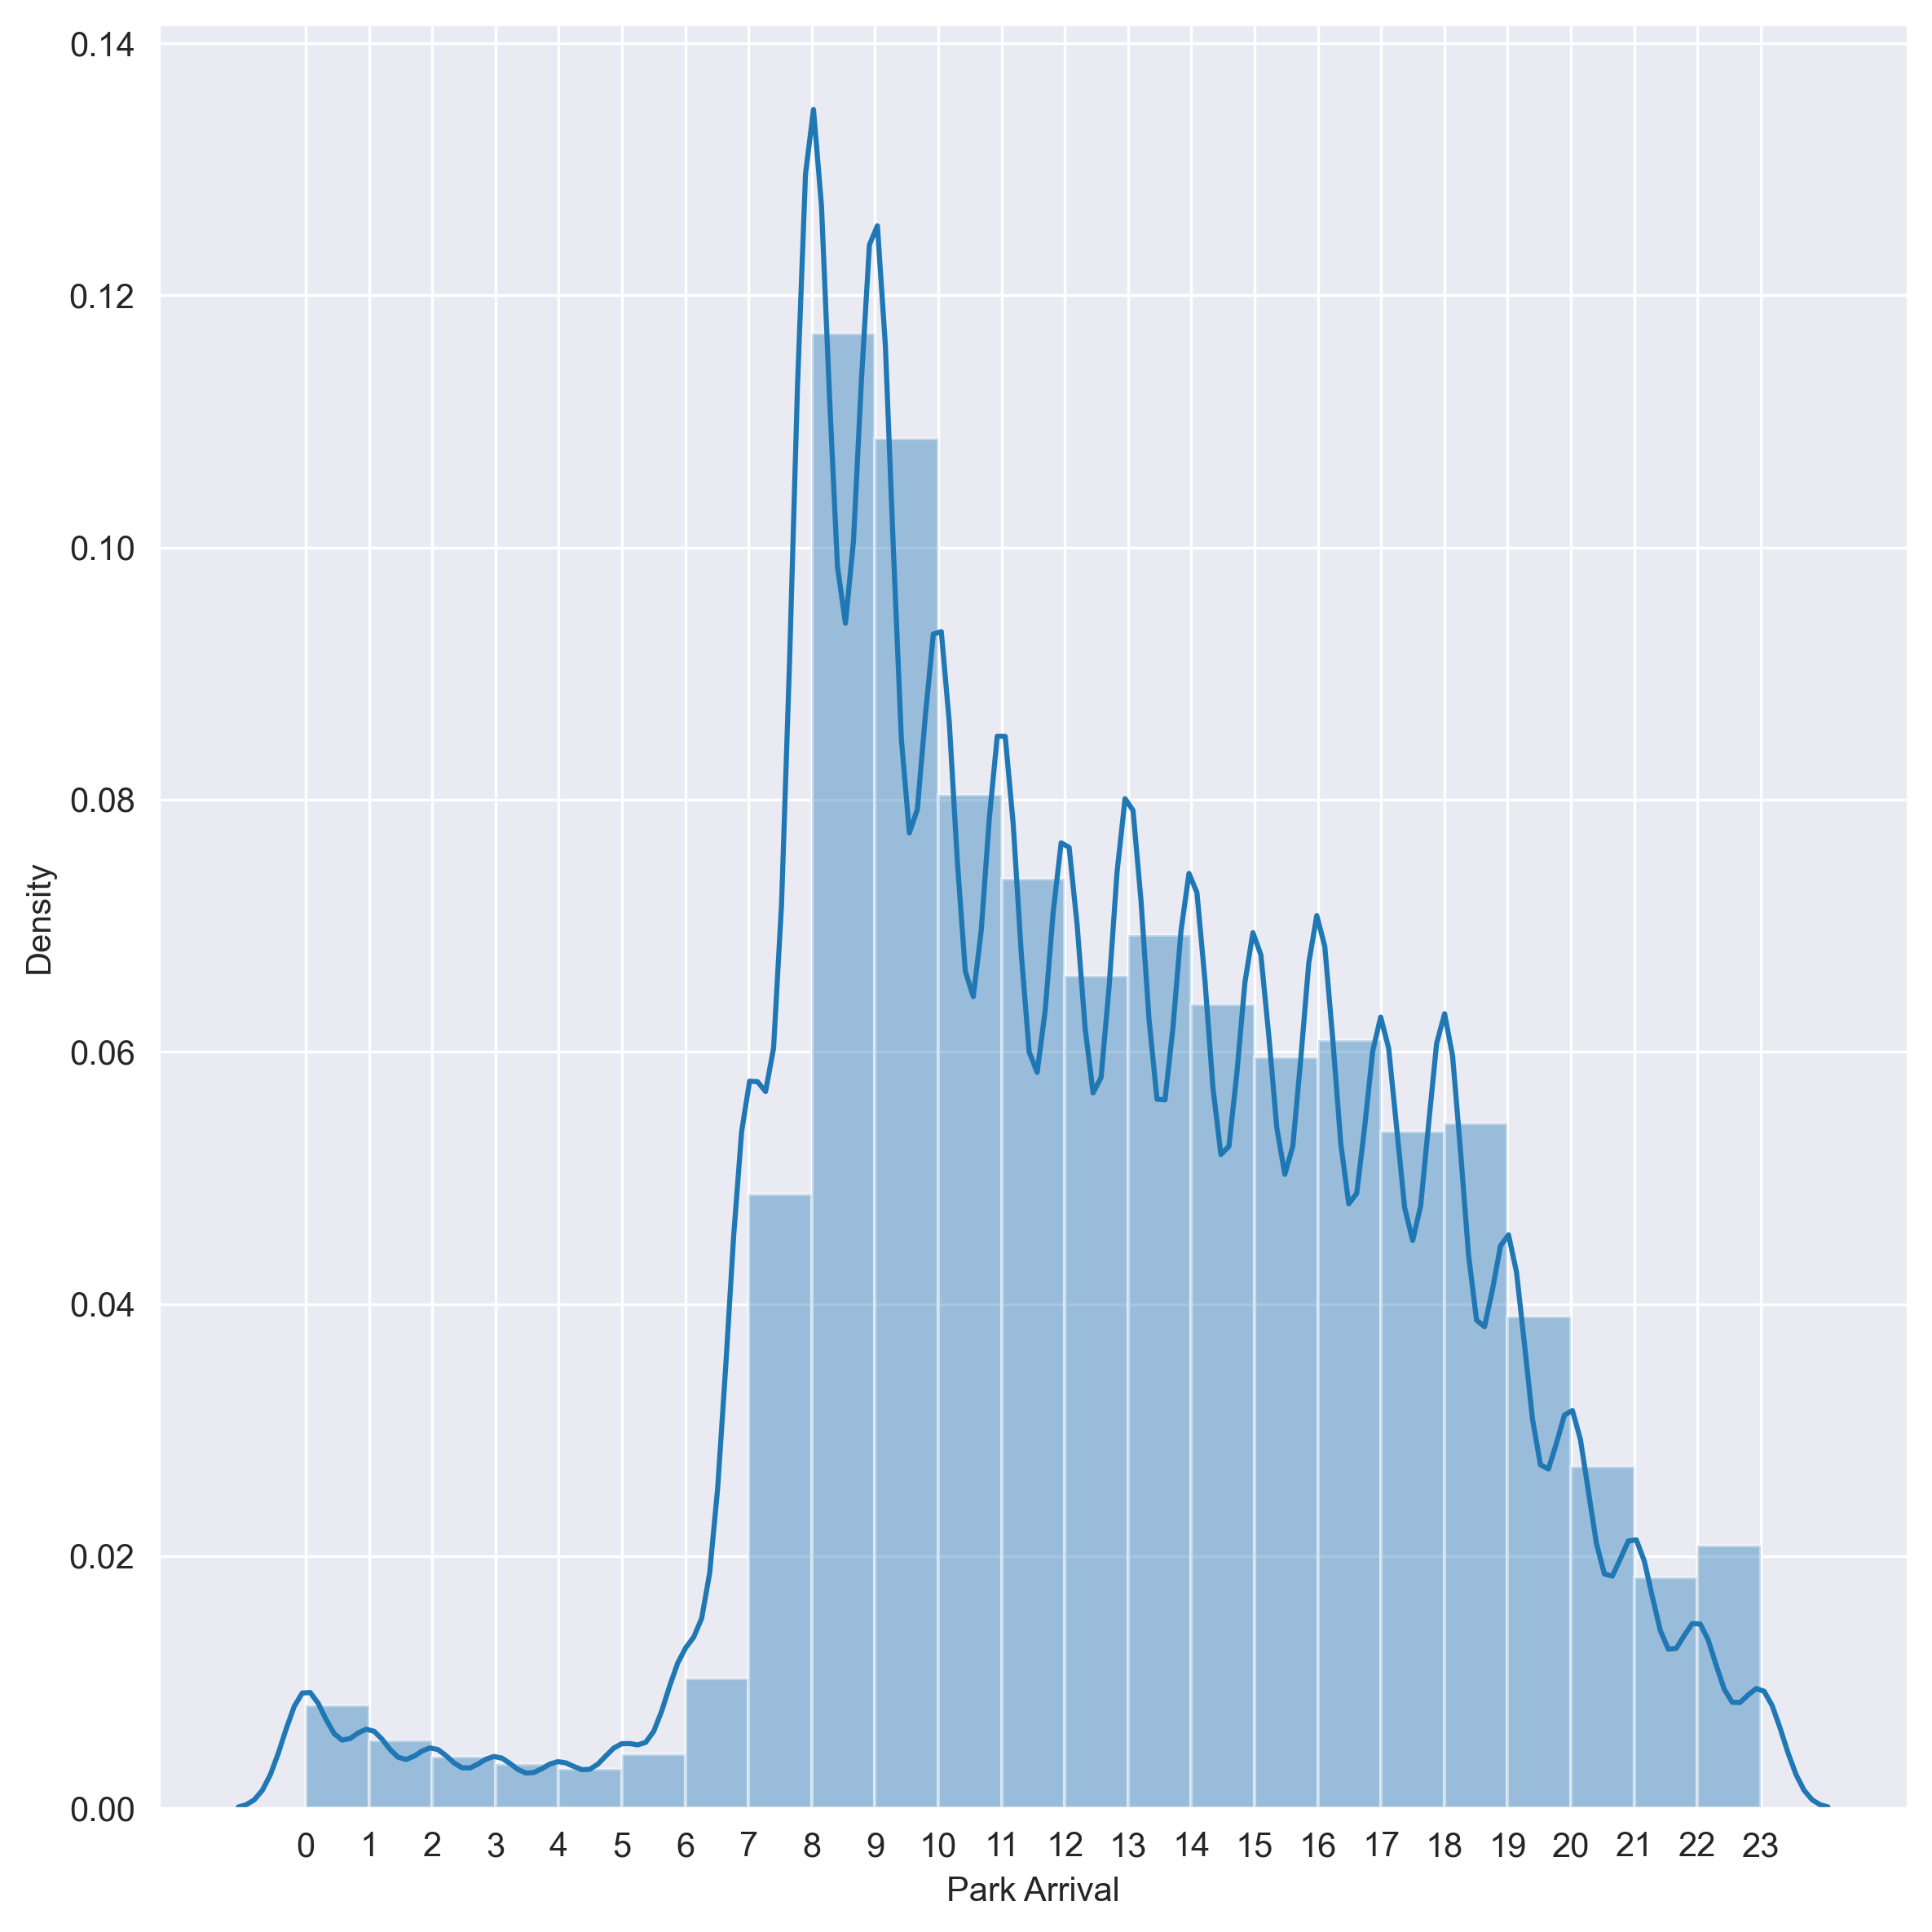

In [40]:
fig = plt.figure(figsize=(8,8),dpi=300)
axes = plt.subplot()
sns.distplot(park_data['hour_x'],bins=[x for x in range(24)],axlabel='Park Arrival',ax=axes)
axes.set_xticks([x for x in range(24)])
axes.set_ylabel('Density')
plt.tight_layout()
plt.savefig(r"G:\2023-纵向\停车分配\需求分布\park_arrival.png",dpi=300)
plt.show()

In [51]:
# 用堆叠柱状图表示
def make_label(x):
    if x <=60:
        return 0
    else:
        return 1

charge_data['label'] = charge_data['充电时长(分)'].apply(make_label)

F:\Anaconda\envs\myenv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 20805 (\N{CJK UNIFIED IDEOGRAPH-5145}) missing from current font.
  fig.canvas.draw()
F:\Anaconda\envs\myenv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from current font.
  fig.canvas.draw()
F:\Anaconda\envs\myenv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.draw()
F:\Anaconda\envs\myenv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  fig.canvas.draw()
F:\Anaconda\envs\myenv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.draw()


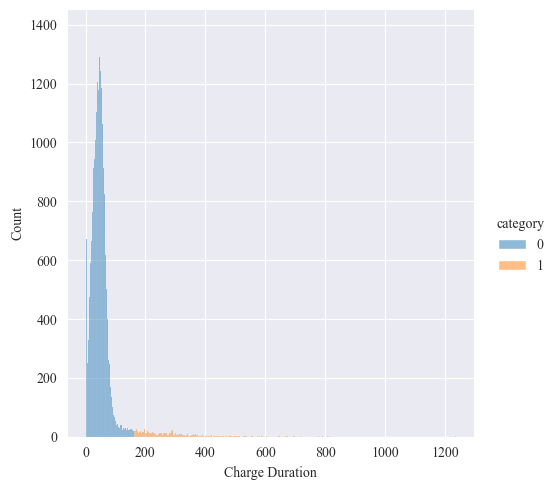

In [84]:
g = sns.displot(data=new_charge_data,x='充电时长(分)',hue='category')
g.set_xlabels("Charge Duration")
g.savefig(r"G:\2023-纵向\停车分配\需求分布\new charge duration.png",dpi=300)

In [54]:
charge_data[charge_data['label']==0]['充电时长(分)'].describe()

count    28605.000000
mean        34.661167
std         16.533432
min          0.000000
25%         23.300000
50%         37.120000
75%         48.300000
max         60.000000
Name: 充电时长(分), dtype: float64

In [55]:
charge_data[charge_data['label']==1]['充电时长(分)'].describe()

count    9220.000000
mean      108.841791
std        85.265423
min        60.020000
25%        65.400000
50%        73.725000
75%       104.540000
max      1236.100000
Name: 充电时长(分), dtype: float64

C:\Users\11249\AppData\Local\Temp\ipykernel_13736\3443443355.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_charge_data['category'] = kmeans.labels_


Cluster centers: [[ 44.00803049]
 [276.68424648]]


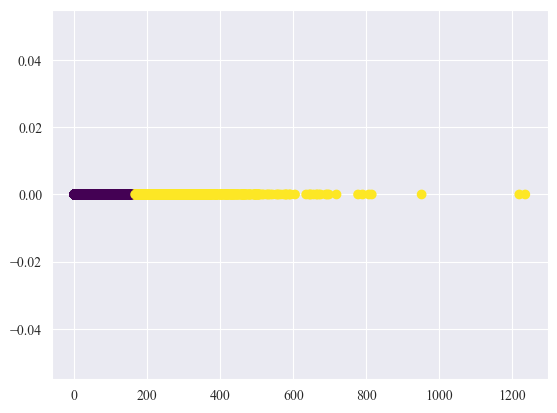

In [60]:
new_charge_data = charge_data.dropna()
y = new_charge_data[['充电时长(分)']]
kmeans = KMeans(n_clusters=2,random_state=0).fit(y)
new_charge_data['category'] = kmeans.labels_
print("Cluster centers:", kmeans.cluster_centers_)

# （可选）画出聚类结果
plt.scatter(new_charge_data['充电时长(分)'], [0]*len(y), c=new_charge_data['category'], cmap='viridis')
plt.show()

In [62]:
new_charge_data[new_charge_data['category']==0]['充电时长(分)'].describe()

count    36410.000000
mean        44.023987
std         25.153481
min          0.000000
25%         27.520000
50%         43.330000
75%         57.580000
max        160.300000
Name: 充电时长(分), dtype: float64

In [63]:
new_charge_data[new_charge_data['category']==1]['充电时长(分)'].describe()

count    1415.000000
mean      277.095830
std       106.986289
min       160.530000
25%       199.900000
50%       254.400000
75%       317.950000
max      1236.100000
Name: 充电时长(分), dtype: float64

In [64]:
park_data[park_data['category']==0]['park_t'].describe()

count    67967.000000
mean       349.173039
std         85.398312
min        215.633333
25%        273.350000
50%        342.466667
75%        422.875000
max        504.033333
Name: park_t, dtype: float64

In [65]:
park_data[park_data['category']==1]['park_t'].describe()

count    43124.000000
mean      1246.680820
std        141.742722
min        951.666667
25%       1132.562500
50%       1269.725000
75%       1374.516667
max       1439.983333
Name: park_t, dtype: float64

In [66]:
park_data[park_data['category']==2]['park_t'].describe()

count    148200.000000
mean         78.805313
std          61.561963
min           3.000000
25%          22.200000
50%          66.400000
75%         125.333333
max         215.616667
Name: park_t, dtype: float64

In [67]:
park_data[park_data['category']==3]['park_t'].describe()

count    60336.000000
mean       654.447310
std        120.265539
min        504.050000
25%        556.433333
50%        615.666667
75%        735.783333
max        951.633333
Name: park_t, dtype: float64

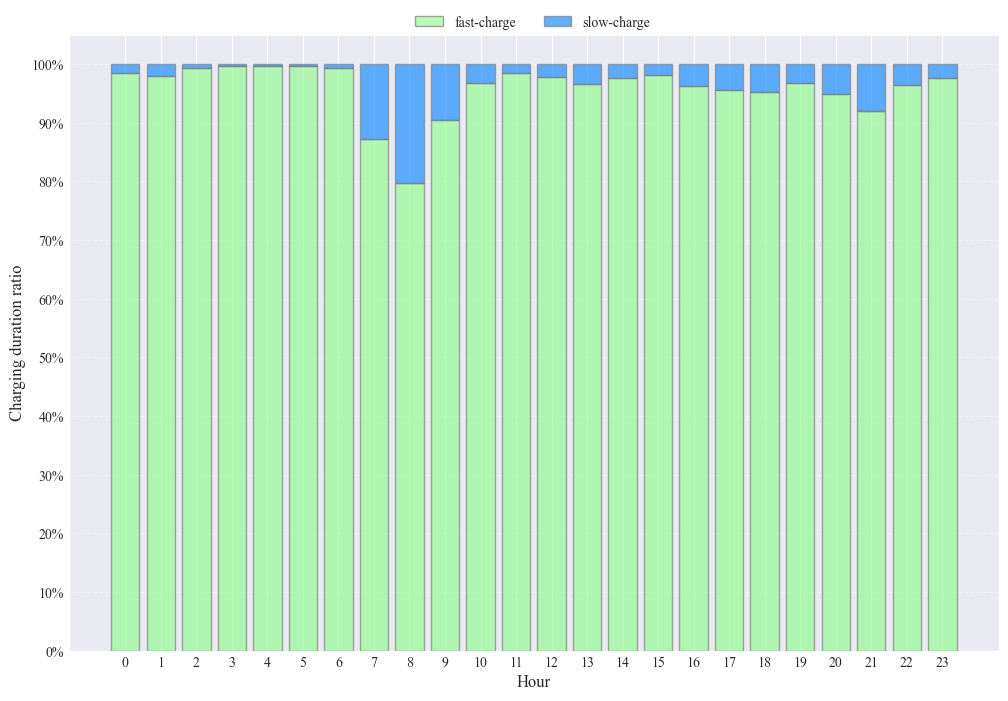

In [74]:
# charge_data['label'] = charge_data['充电时长(分)'].apply(make_label)
ori_data = new_charge_data[['start_c','充电时长(分)','category']]
group_data = ori_data.groupby('start_c')

plt.rcParams['font.family'] = 'Times New Roman'
count_value = []
for i,each in enumerate(group_data):
    count_value.append([len(each[1].loc[each[1]['category']==i])/len(each[1]) for i in range(2)])
plt.figure(figsize=(12,8))
x = [i for i in range(24)]
for i in range(24):
    temp0 = count_value[i][0]
    temp1 = count_value[i][1]
    plt.bar(x[i],height=temp0,label='0',color='#98FB98',edgecolor='grey',zorder=5,alpha=0.7)
    plt.bar(x[i],height=temp1,bottom=temp0,label='1',color='#1E90FF',edgecolor='grey',zorder=5,alpha=0.7)
plt.xlabel('Hour',fontsize=12)
plt.ylabel('Charging duration ratio',fontsize=12)
plt.tick_params(axis='both',which='both',direction='in',labelsize=10)
plt.xticks(x,x)
plt.yticks(np.arange(0,1.1,0.1),[f'{i}%' for i in range(0,110,10)])
plt.grid(axis='y',alpha=0.5,ls='--')
plt.figlegend(['fast-charge','slow-charge'],frameon=False,bbox_to_anchor=(0.62,0.92),ncol=2)
plt.savefig(r"G:\2023-纵向\停车分配\需求分布\充电时长分类新.png",dpi=300,bbox_inches='tight')
plt.show()